# Exercise 5 : Classification Tree

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1 : Predicting CentralAir using SalePrice

In [2]:
houseData = pd.read_csv('train.csv')
# houseData.head()

a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.

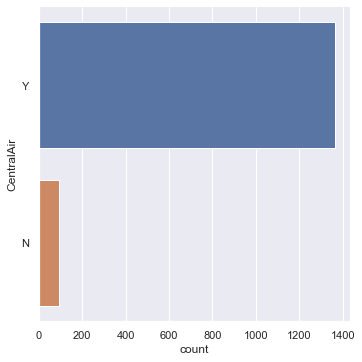

In [3]:
# CentralAir: Central air conditioning

sb.catplot(y = "CentralAir", data = houseData, kind = "count")

In [4]:
houseData['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [5]:
print("The ratio of the classes Y:N is {0:.2f}".format(1365/95))

# number of N is much lesser than the Y which might impact the precision of the classification tree model

The ratio of the classes Y:N is 14.37


b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.

In [6]:
centralvsale = pd.DataFrame(houseData[['CentralAir', 'SalePrice']])

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

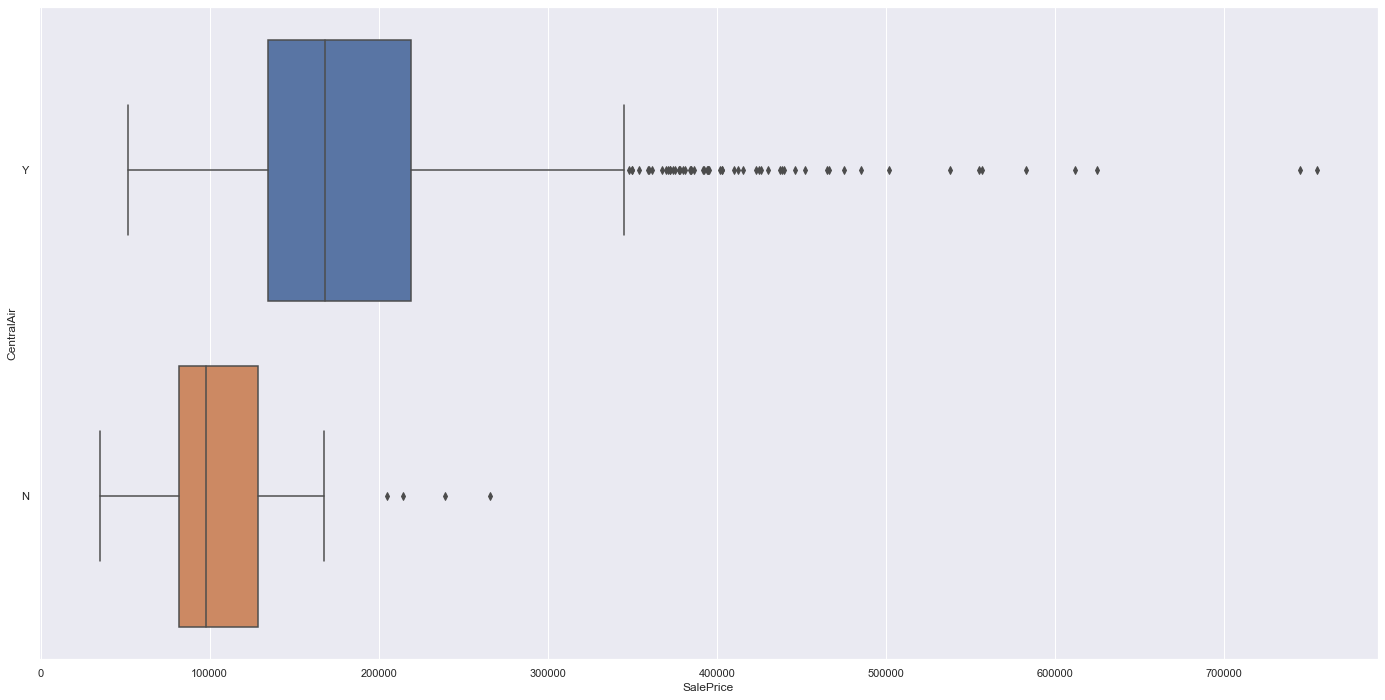

In [7]:
f = plt.figure(figsize=(24, 12))

sb.boxplot(x = 'SalePrice', y = "CentralAir", data = centralvsale, orient = "h")
# sb.barplot(x = 'SalePrice', y = "CentralAir", data = centralvsale, ax = axes[1])
# sb.boxenplot(x = 'SalePrice', y = "CentralAir", data = centralvsale, orient = "h", ax = axes[2])

c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

In [8]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [9]:
from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(houseData, test_size = 0.246)
# trainData
# testData

e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.

In [10]:
train_sale = pd.DataFrame(trainData['SalePrice'])
train_central = pd.DataFrame(trainData['CentralAir'])

test_sale = pd.DataFrame(testData['SalePrice'])
test_central = pd.DataFrame(testData['CentralAir'])

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(train_sale, train_central)

DecisionTreeClassifier(max_depth=2)

f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree

[Text(334.8, 543.6, 'SalePrice <= 98150.0\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = N'),
 Text(167.4, 326.16, 'SalePrice <= 59250.0\ngini = 0.494\nsamples = 83\nvalue = [37, 46]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.48\nsamples = 75\nvalue = [30, 45]\nclass = N'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 137950.0\ngini = 0.066\nsamples = 1017\nvalue = [35, 982]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.165\nsamples = 275\nvalue = [25, 250]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.027\nsamples = 742\nvalue = [10, 732]\nclass = N')]

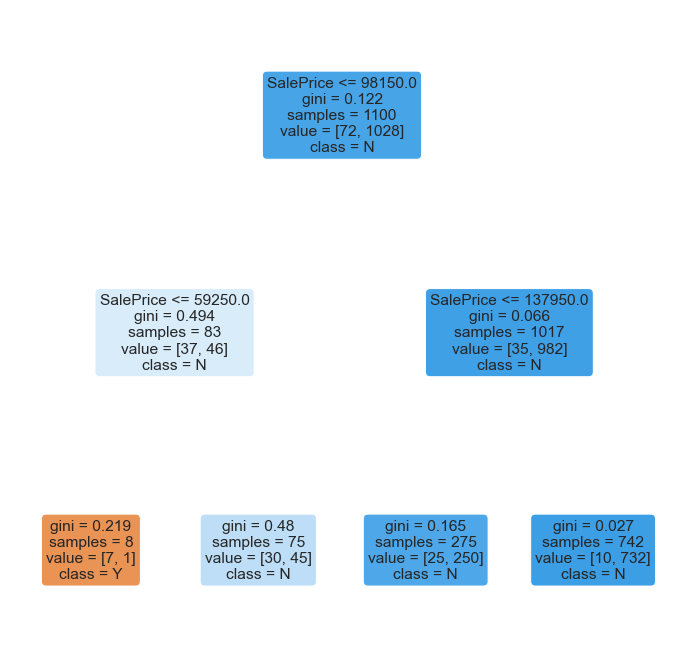

In [11]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["Y","N"])

g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

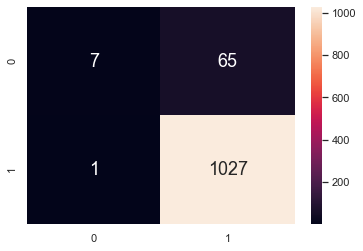

In [12]:
# # Predict Legendary corresponding to Total Train
# legnd_train_pred = dectree.predict(total_train)

central_pred = dectree.predict(train_sale)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_central, central_pred)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.

In [13]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(train_sale, train_central))
print("True Positive Rate \t\t:", cm[1][1]/sum(cm[1]))
print("True Negative Rate \t\t:", cm[0][0]/sum(cm[0])) 
print("False Positive Rate \t\t:", cm[1][0]/sum(cm[1]))
print("False Negative Rate \t\t:", cm[0][1]/sum(cm[0]))

Classification Accuracy 	: 0.94
True Positive Rate 		: 0.9990272373540856
True Negative Rate 		: 0.09722222222222222
False Positive Rate 		: 0.0009727626459143969
False Negative Rate 		: 0.9027777777777778


i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.

<AxesSubplot:>

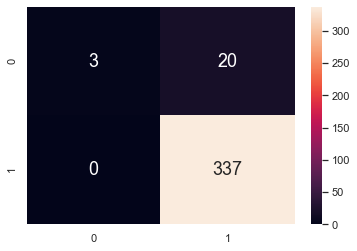

In [14]:
central_test_pred = dectree.predict(test_sale)

cm2 = confusion_matrix(test_central, central_test_pred)
sb.heatmap(cm2, annot = True, fmt=".0f", annot_kws={"size": 18})

j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate,
True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.

In [15]:
print("Classification Accuracy \t:", dectree.score(test_sale, test_central))
print("True Positive Rate \t\t:", cm2[1][1]/sum(cm2[1]))
print("True Negative Rate \t\t:", cm2[0][0]/sum(cm2[0]))
print("False Positive Rate \t\t:", cm2[1][0]/sum(cm2[1]))
print("False Negative Rate \t\t:", cm2[0][1]/sum(cm2[0]))

Classification Accuracy 	: 0.9444444444444444
True Positive Rate 		: 1.0
True Negative Rate 		: 0.13043478260869565
False Positive Rate 		: 0.0
False Negative Rate 		: 0.8695652173913043


## Problem 2 : Predicting CentralAir using Other Variables
Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

### GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='CentralAir'>

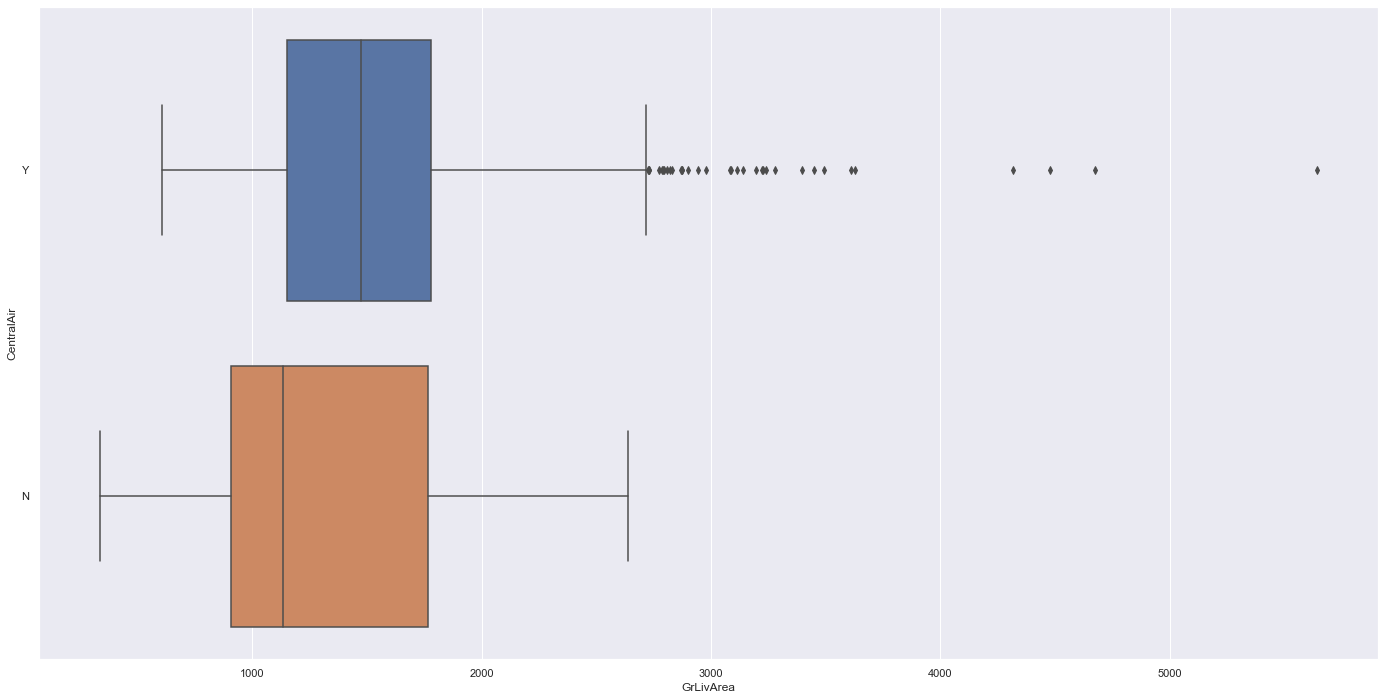

In [16]:
centralvgrliv = pd.DataFrame(houseData[['CentralAir', 'GrLivArea']])
f = plt.figure(figsize=(24, 12))
sb.boxplot(x = 'GrLivArea', y = "CentralAir", data = centralvgrliv, orient = "h")

[Text(334.8, 543.6, 'GrLivArea <= 803.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = N'),
 Text(167.4, 326.16, 'GrLivArea <= 562.5\ngini = 0.439\nsamples = 40\nvalue = [13, 27]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.411\nsamples = 38\nvalue = [11, 27]\nclass = N'),
 Text(502.20000000000005, 326.16, 'GrLivArea <= 1194.0\ngini = 0.105\nsamples = 1060\nvalue = [59, 1001]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.174\nsamples = 290\nvalue = [28, 262]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.077\nsamples = 770\nvalue = [31, 739]\nclass = N')]

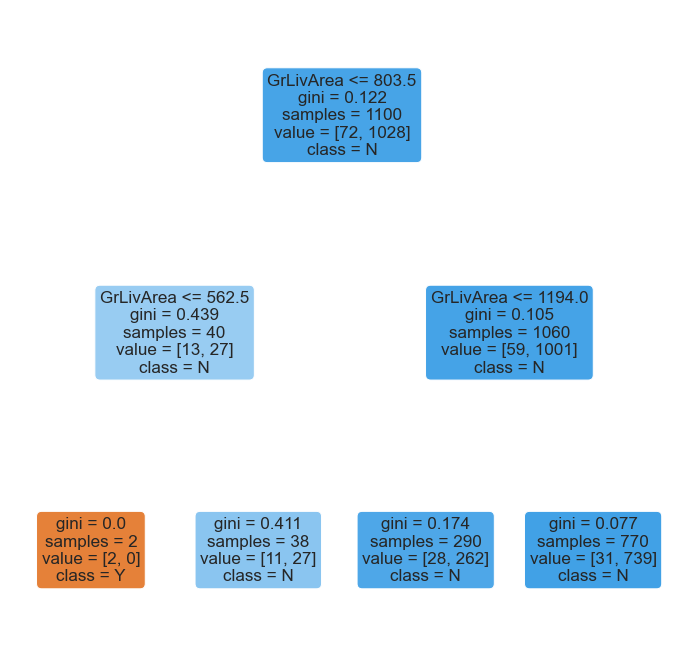

In [17]:
train_grliv = pd.DataFrame(trainData['GrLivArea'])
test_grliv = pd.DataFrame(testData['GrLivArea'])

dectree2 = DecisionTreeClassifier(max_depth = 2)
dectree2.fit(train_grliv, train_central)

f = plt.figure(figsize=(12,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["Y","N"])

GrlivArea
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9363636363636364
True Positive Rate 		: 1.0
True Negative Rate 		: 0.027777777777777776
False Positive Rate 		: 0.0
False Negative Rate 		: 0.9722222222222222

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9416666666666667
True Positive Rate 		: 1.0
True Negative Rate 		: 0.08695652173913043
False Positive Rate 		: 0.0
False Negative Rate 		: 0.9130434782608695


<AxesSubplot:>

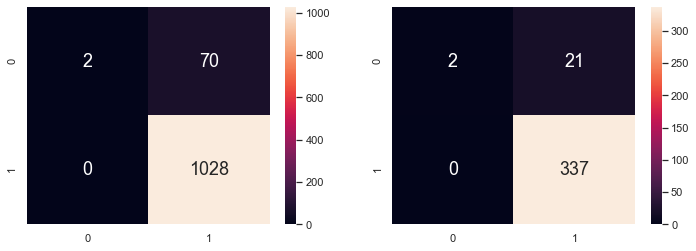

In [18]:
# Predict Response corresponding to Predictors
grliv_train_pred = dectree2.predict(train_grliv)
grliv_test_pred = dectree2.predict(test_grliv)

cm2 = confusion_matrix(train_central, grliv_train_pred)
pred2 = confusion_matrix(test_central, grliv_test_pred)

# Check the Goodness of Fit (on Train Data)
print("GrlivArea")
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(train_grliv, train_central))
print("True Positive Rate \t\t:", cm2[1][1]/sum(cm2[1]))
print("True Negative Rate \t\t:", cm2[0][0]/sum(cm2[0])) 
print("False Positive Rate \t\t:", cm2[1][0]/sum(cm2[1]))
print("False Negative Rate \t\t:", cm2[0][1]/sum(cm2[0]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(test_grliv, test_central))
print("True Positive Rate \t\t:", pred2[1][1]/sum(pred2[1]))
print("True Negative Rate \t\t:", pred2[0][0]/sum(pred2[0])) 
print("False Positive Rate \t\t:", pred2[1][0]/sum(pred2[1]))
print("False Negative Rate \t\t:", pred2[0][1]/sum(pred2[0]))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_central, grliv_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(test_central, grliv_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='CentralAir'>

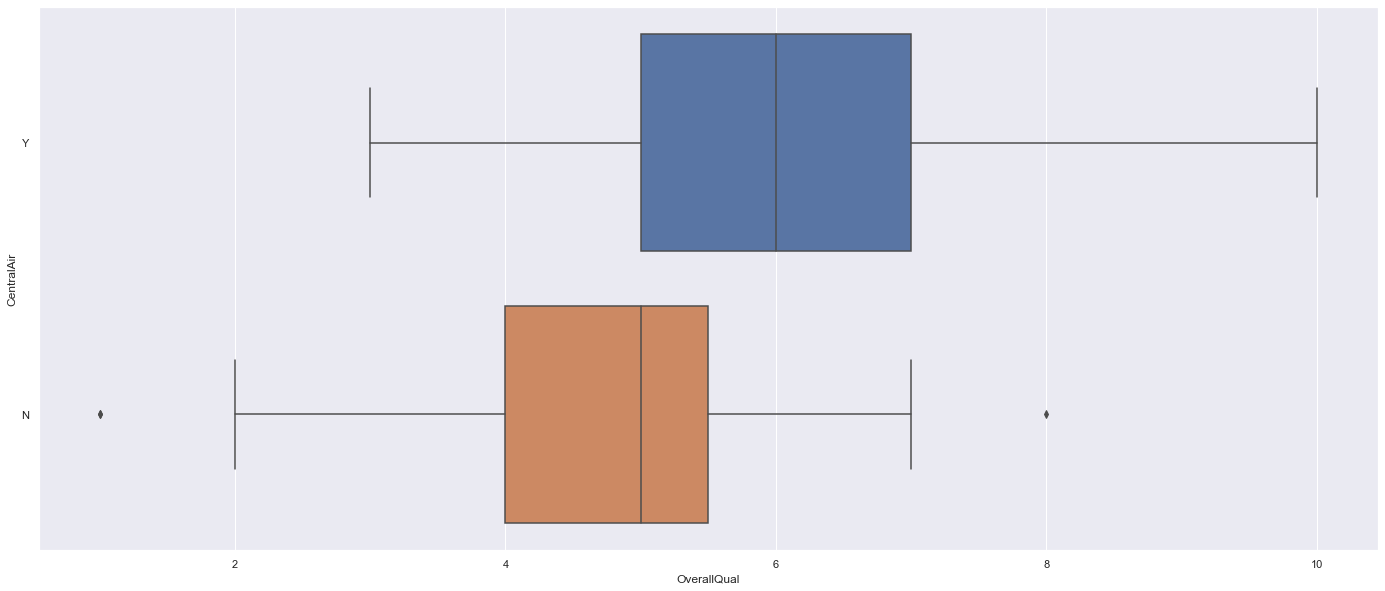

In [19]:
centralvoverall = pd.DataFrame(houseData[['CentralAir', 'OverallQual']])
f = plt.figure(figsize=(24, 10))
sb.boxplot(x = 'OverallQual', y = "CentralAir", data = centralvoverall, orient = "h")

[Text(334.8, 543.6, 'OverallQual <= 3.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = N'),
 Text(167.4, 326.16, 'OverallQual <= 2.5\ngini = 0.495\nsamples = 20\nvalue = [11, 9]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.5\nsamples = 18\nvalue = [9, 9]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'OverallQual <= 4.5\ngini = 0.107\nsamples = 1080\nvalue = [61, 1019]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.31\nsamples = 94\nvalue = [18, 76]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.083\nsamples = 986\nvalue = [43, 943]\nclass = N')]

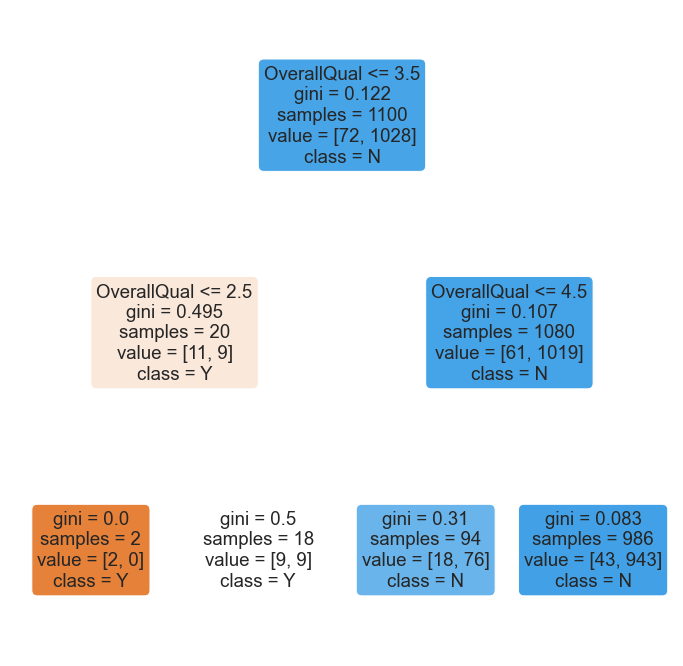

In [20]:
train_overallqual = pd.DataFrame(trainData['OverallQual'])
test_overallqual = pd.DataFrame(testData['OverallQual'])

dectree3 = DecisionTreeClassifier(max_depth = 2)
dectree3.fit(train_overallqual, train_central)

f = plt.figure(figsize=(12,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["Y","N"])

overall qual
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9363636363636364
True Positive Rate 		: 0.9912451361867705
True Negative Rate 		: 0.1527777777777778
False Positive Rate 		: 0.008754863813229572
False Negative Rate 		: 0.8472222222222222

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95
True Positive Rate 		: 1.0
True Negative Rate 		: 0.21739130434782608
False Positive Rate 		: 0.0
False Negative Rate 		: 0.782608695652174


<AxesSubplot:>

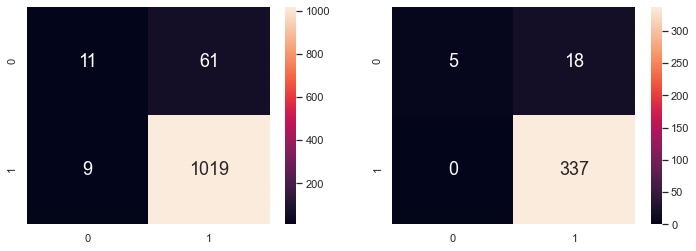

In [21]:
central_pred3 = dectree3.predict(train_overallqual)
central_test_pred3 = dectree3.predict(test_overallqual)

cm3 = confusion_matrix(train_central, central_pred3)
pred3 = confusion_matrix(test_central, central_test_pred3)

print("overall qual")
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(train_overallqual, train_central))
print("True Positive Rate \t\t:", cm3[1][1]/sum(cm3[1]))
print("True Negative Rate \t\t:", cm3[0][0]/sum(cm3[0])) 
print("False Positive Rate \t\t:", cm3[1][0]/sum(cm3[1]))
print("False Negative Rate \t\t:", cm3[0][1]/sum(cm3[0]))

print("\nGoodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(test_overallqual, test_central))
print("True Positive Rate \t\t:", pred3[1][1]/sum(pred3[1]))
print("True Negative Rate \t\t:", pred3[0][0]/sum(pred3[0])) 
print("False Positive Rate \t\t:", pred3[1][0]/sum(pred3[1]))
print("False Negative Rate \t\t:", pred3[0][1]/sum(pred3[0]))

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(cm3, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(pred3, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

### Year Built

<AxesSubplot:xlabel='YearBuilt', ylabel='CentralAir'>

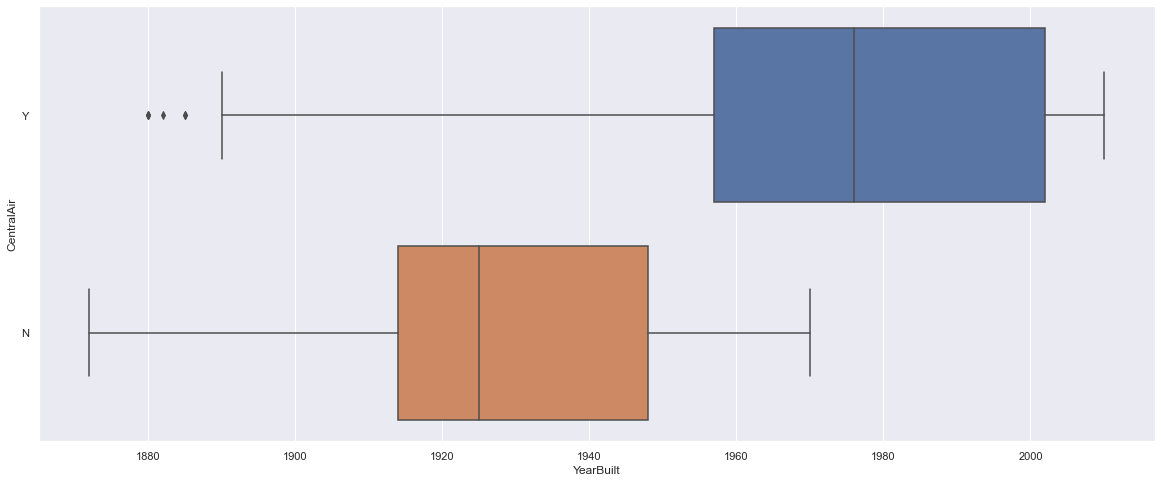

In [22]:
centralvyearbuilt = pd.DataFrame(houseData[['CentralAir', 'YearBuilt']])
f = plt.figure(figsize=(20, 8))
sb.boxplot(x = 'YearBuilt', y = "CentralAir", data = centralvyearbuilt, orient = "h")

[Text(334.8, 543.6, 'YearBuilt <= 1917.5\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]\nclass = N'),
 Text(167.4, 326.16, 'YearBuilt <= 1881.0\ngini = 0.5\nsamples = 61\nvalue = [30, 31]\nclass = N'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.498\nsamples = 58\nvalue = [27, 31]\nclass = N'),
 Text(502.20000000000005, 326.16, 'YearBuilt <= 1955.5\ngini = 0.078\nsamples = 1039\nvalue = [42, 997]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.253\nsamples = 249\nvalue = [37, 212]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.013\nsamples = 790\nvalue = [5, 785]\nclass = N')]

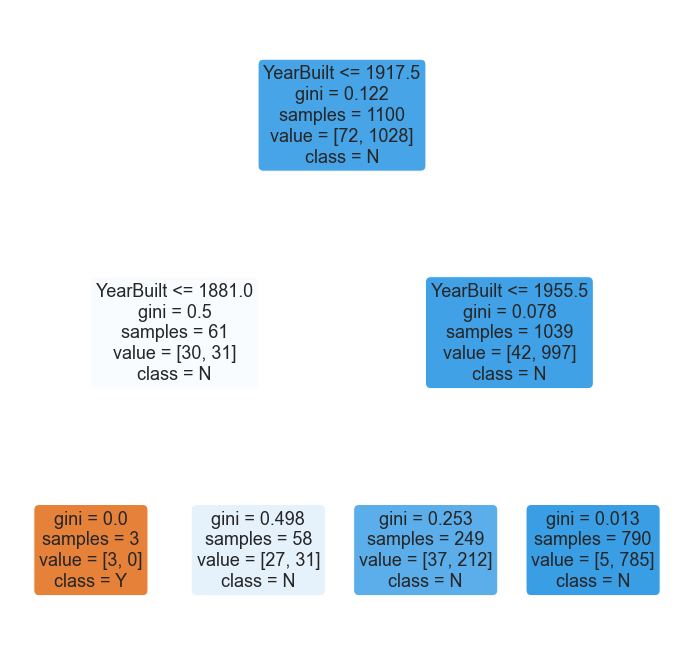

In [23]:
train_yearbuilt = pd.DataFrame(trainData['YearBuilt'])
test_yearbuilt = pd.DataFrame(testData['YearBuilt'])

dectree4 = DecisionTreeClassifier(max_depth = 2)
dectree4.fit(train_yearbuilt, train_central)

f = plt.figure(figsize=(12,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["Y","N"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9372727272727273
True Positive Rate 		: 1.0
True Negative Rate 		: 0.041666666666666664
False Positive Rate 		: 0.0
False Negative Rate 		: 0.9583333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9277777777777778
True Positive Rate 		: 1.0
True Negative Rate 		: 0.13043478260869565
False Positive Rate 		: 0.0
False Negative Rate 		: 0.8695652173913043


<AxesSubplot:>

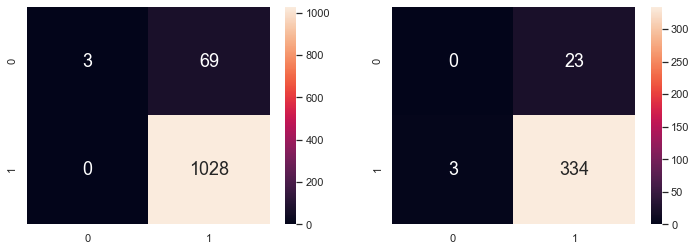

In [24]:
# Predict Response corresponding to Predictors
yearbuilt_train_pred = dectree4.predict(train_yearbuilt)
yearbuilt_test_pred = dectree4.predict(test_yearbuilt)

cm4 = confusion_matrix(train_central, yearbuilt_train_pred)
pred4 = confusion_matrix(test_central, central_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(train_yearbuilt, train_central))
print("True Positive Rate \t\t:", cm4[1][1]/sum(cm4[1]))
print("True Negative Rate \t\t:", cm4[0][0]/sum(cm4[0])) 
print("False Positive Rate \t\t:", cm4[1][0]/sum(cm4[1]))
print("False Negative Rate \t\t:", cm4[0][1]/sum(cm4[0]))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(test_yearbuilt, test_central))
print("True Positive Rate \t\t:", pred4[1][1]/sum(pred4[1]))
print("True Negative Rate \t\t:", pred4[0][0]/sum(pred4[0])) 
print("False Positive Rate \t\t:", pred4[1][0]/sum(pred4[1]))
print("False Negative Rate \t\t:", pred4[0][1]/sum(pred4[0]))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_central, yearbuilt_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(test_central, yearbuilt_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Problem 3 : Best Uni-Variate Model to Predict CentralAir
Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on
both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

When comparing the four models on Train Data, the Classification Accuracy for Overall Quality is the highest out of all of the variables, while Sale Price comes in at a close second. The False Positive Rate for Year Built and GrLivArea is the smallest. Although both the True Positive Rate for Year Built and GrLivArea is the highest, the False Negative Rate for Year Built and GrLivArea is also the highest when using Train Data, implying that they are highly inaccurate when predicting true negative. Thus, based on the train data, I think that either Overall Quality or the Sale Price should be use to predict the Central Air due to their greater predictive power on the problem.

When comparing the two models that used Overall Quality and Sale Price on Test Data, the Classification Accuracy for Overall Quality is higher than the one that used Sale Price. In addition, the True Positive Rate for Overall Quality is also greater than that of the Sale Price. The False Negative Rate for Overall Quality is also smaller than the False Negative Rate of the Sale Price.


In conclusion, I think that the Overall Quality model is the best to predict Central Air.
